In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Code Inspection

In [19]:
df = sns.load_dataset('titanic')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
df.head()
# df['class'].value_counts()
# df['pclass'].value_counts()
# df['age'].value_counts()
df['who'].value_counts()
# df['parch'].value_counts().sort_index()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [20]:
df.describe()
df.isnull().sum()
df_null = df.isnull().sum()
df_null[df_null > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

Handling Missing Values

In [22]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\1537549581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\1537549581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [23]:
df.describe()
df.isnull().sum()
df_null = df.isnull().sum()
df_null[df_null > 0]

Series([], dtype: int64)

## Visual Statistics

Univariate Analysis

C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\1597784573.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', palette='viridis', data=df)


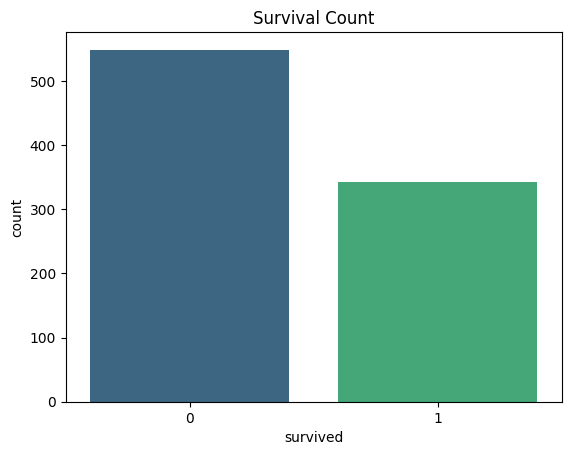

In [25]:
sns.countplot(x='survived', palette='viridis', data=df)
plt.title('Survival Count')
plt.show()

In [37]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title= 'Titanic report', explorative=True)
profile.to_file('titanic_report.html')

c:\Users\bhart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 48.49it/s]


C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\4029660796.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data= df, x='pclass', palette='viridis', kind='count')


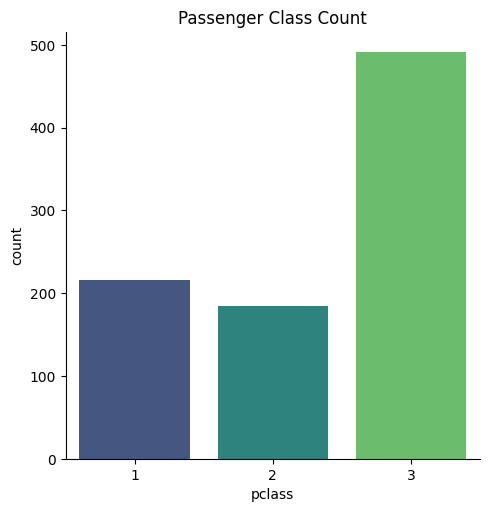

In [38]:
sns.catplot(data= df, x='pclass', palette='viridis', kind='count')
plt.title('Passenger Class Count')
plt.show()

Bivariate Analysis

In [ ]:
sns.relplot(data= df, x='pclass', y='survived', kind='line', hue='sex', palette='viridis')    

C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\1242611469.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x='survived', y='fare', palette='viridis')


<Axes: xlabel='survived', ylabel='fare'>

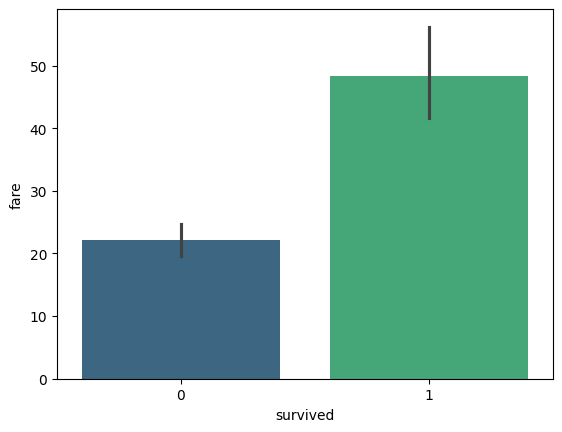

In [51]:
sns.barplot(data= df, x='survived', y='fare', palette='viridis')

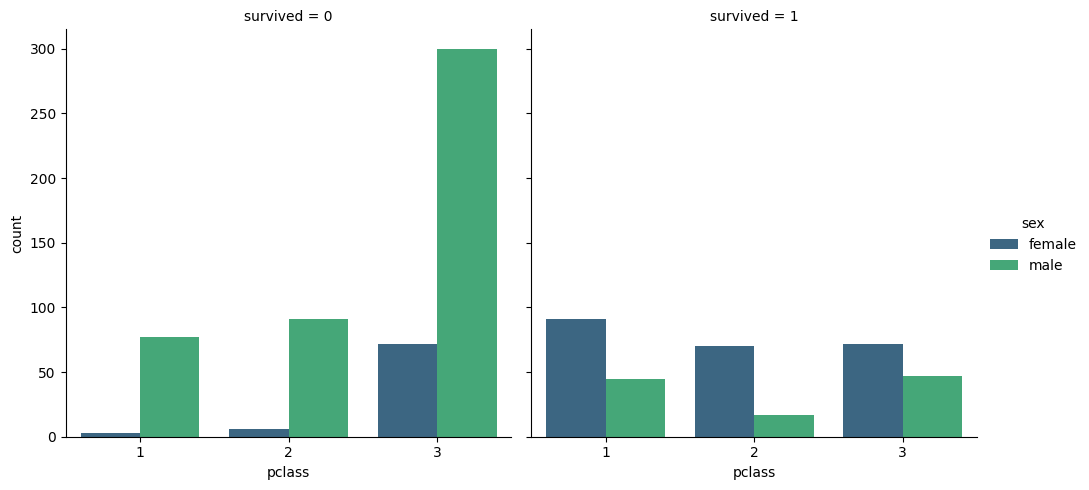

In [54]:
sns.catplot(data=df, x='pclass', hue='sex', col='survived', kind='count', palette='viridis')

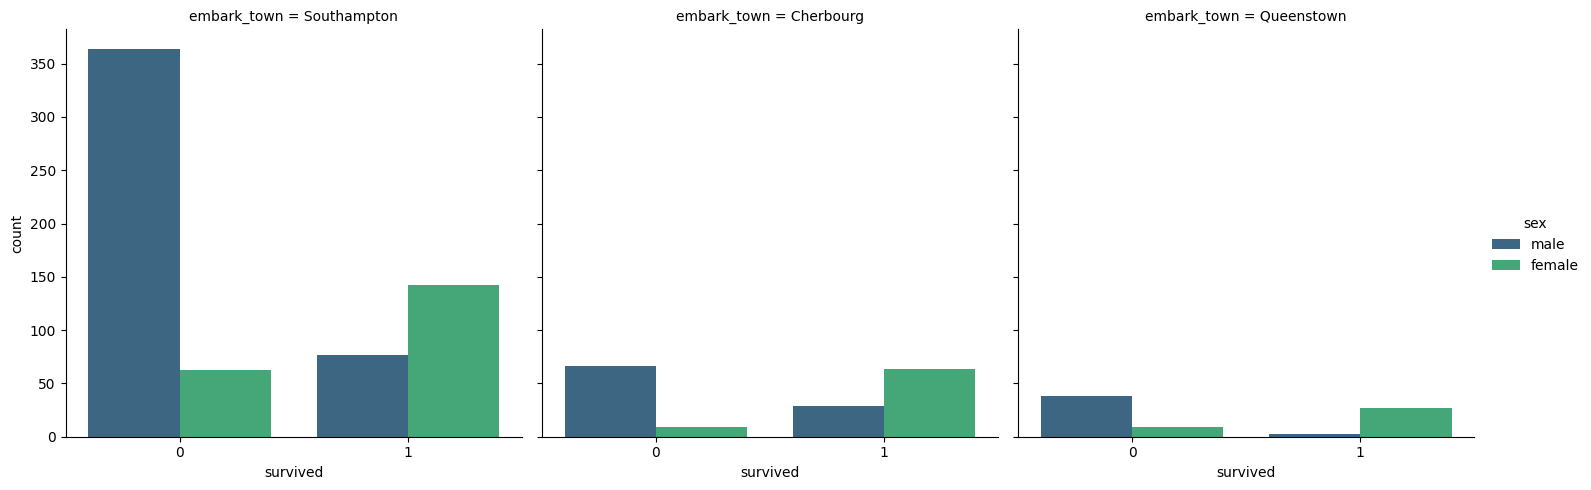

In [61]:
sns.catplot(data=df, x='survived', hue='sex', col='embark_town', kind='count', palette='viridis')

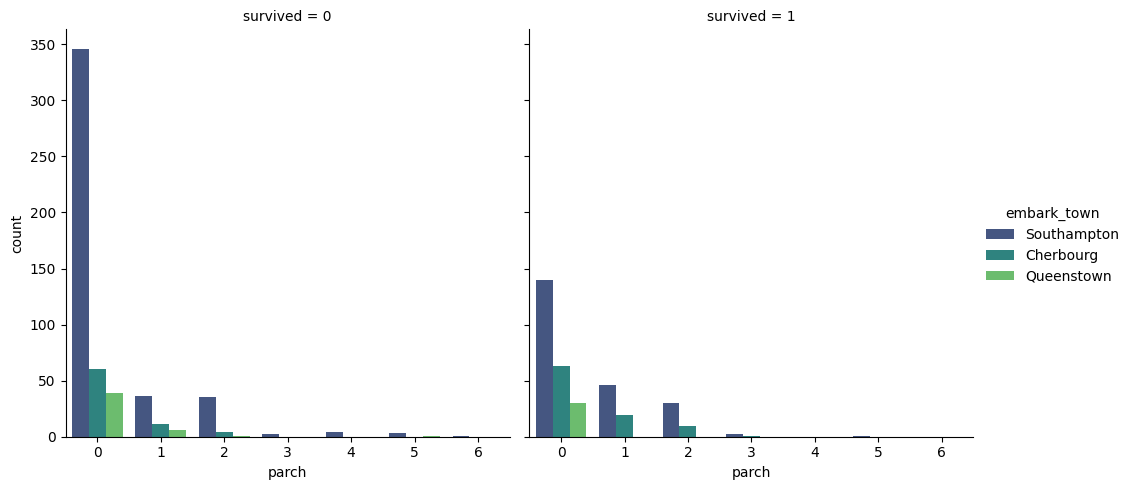

In [67]:
sns.catplot(data=df, x='parch', hue='embark_town', col='survived', kind='count', palette='viridis')

In [ ]:
sns.catplot(data=df, x='sibsp', hue='embark_town', col='survived', kind='count', palette='viridis')

In [ ]:
sns.relplot(data=df, x='age', y='fare', kind='scatter', col='embark_town', style='sex', hue='survived', palette='viridis')

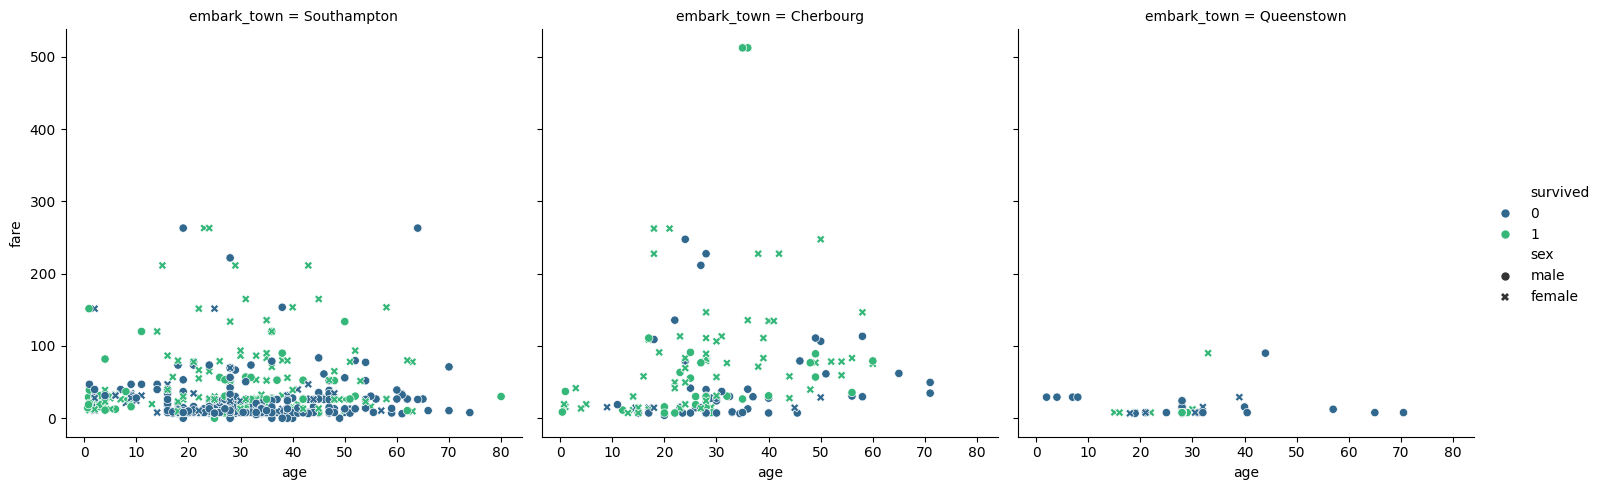

In [73]:
sns.relplot(data=df, x='age', y='fare', kind='scatter', col='embark_town', style='sex', hue='survived', palette='viridis')

C:\Users\bhart\AppData\Local\Temp\ipykernel_4976\4016789969.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fare'], shade=True, color='r')


<Axes: xlabel='fare', ylabel='Density'>

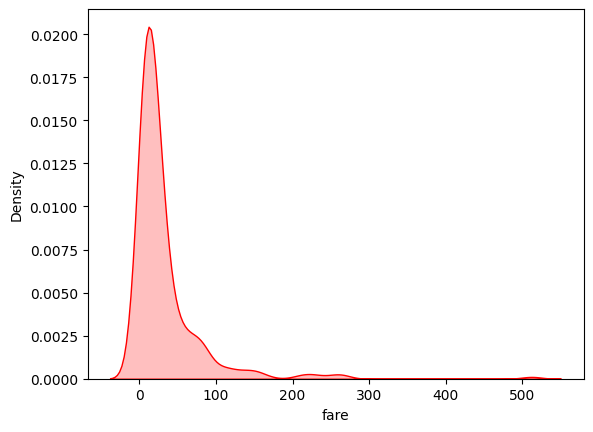

In [74]:
sns.kdeplot(df['fare'], shade=True, color='r')

<Axes: xlabel='age', ylabel='Density'>

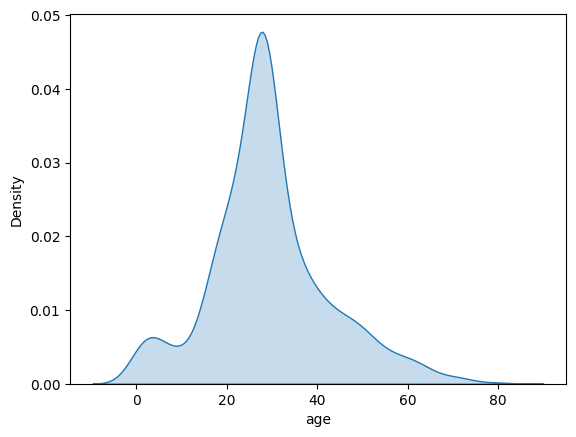

In [76]:
sns.kdeplot(df['age'], fill=True)

sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


<Axes: xlabel='sex', ylabel='pclass'>

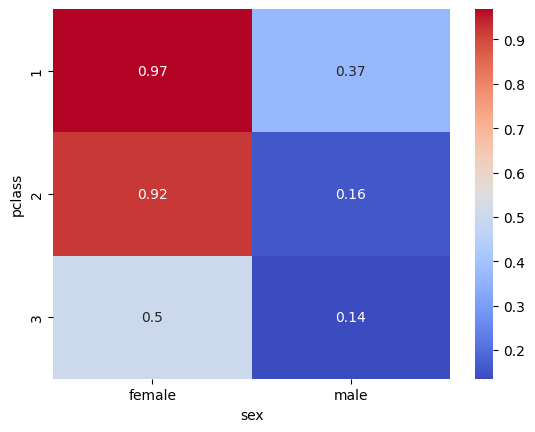

In [82]:
p_table = pd.pivot_table(df, values='survived', index='pclass', columns='sex', aggfunc='mean')
print(p_table)
sns.heatmap(p_table, annot=True, cmap='coolwarm')

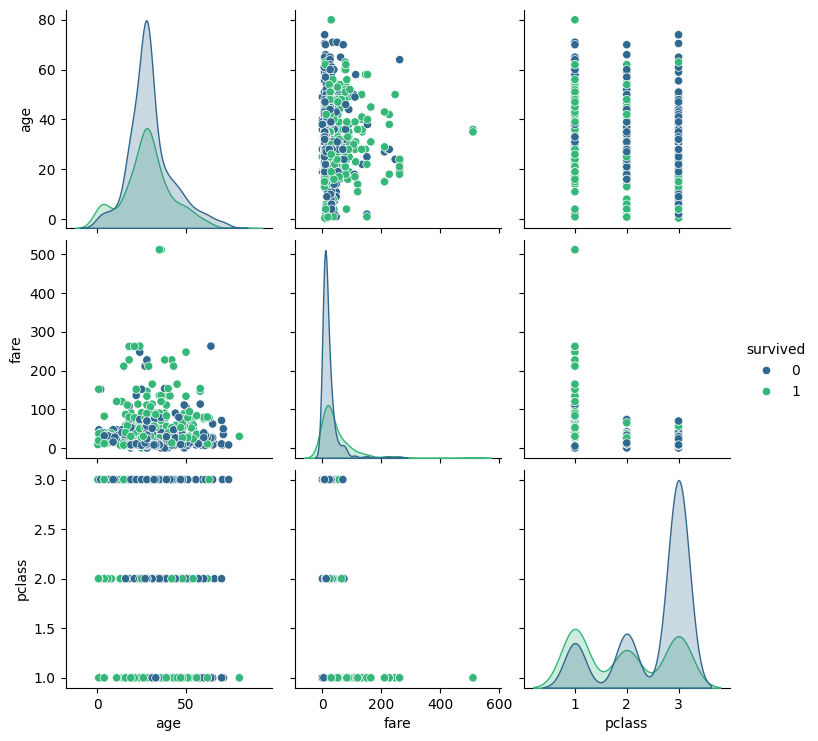

In [83]:
sns.pairplot(df, hue='survived', vars=['age', 'fare', 'pclass'], palette='viridis')